In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


C:\Users\Nitin\AppData\Local\Temp\ipykernel_8824\1773126084.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
def remove_pattern (input_text,pattern):
    r=re.findall(pattern,input_text)
    for i in r:
        input_text=re.sub(i,"",input_text)
    return input_text
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]","")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: "  ".join([w for w in x.split() if len(w)>3]))

In [9]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags k...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [10]:
tokenized_tweet= df['clean_tweet'].apply(lambda x:x.split() )

In [11]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [12]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
tokenized_tweet = tokenized_tweet.apply( lambda x : [stemmer.stem(word) for word in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [13]:
for i in range (len(tokenized_tweet)):
 tokenized_tweet[i]=" ".join(tokenized_tweet[i])


In [14]:
tokenized_tweet.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit can't caus they don't offer...
2                                  bihday your majesti
3    #model love take with time urð±!!! ððð...
4                           factsguide: societi #motiv
Name: clean_tweet, dtype: object

In [15]:
df['clean_tweet']=tokenized_tweet

In [16]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [17]:
all_words="".join([sentences for sentences in df['clean_tweet']])

In [18]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [19]:
all_words

'when father dysfunct selfish drag kid into dysfunction. #runthank #lyft credit can\'t caus they don\'t offer wheelchair van pdx. #disapoint #getthankbihday your majesti#model love take with time urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦factsguide: societi #motiv[2/2] huge fare talk befor they leave. chao disput when they there. #allshowandnogocamp tomorrow dannyâ\x80¦next school year year exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exam #hate #imagin #actorslif #revolutionschool #girlwon!!! love land!!! #allin #cav #champion #cleveland #clevelandcavaliwelcom here it\' #gr8#ireland consum price index (mom) climb from previou 0.2% 0.5% #blog #silver #gold #forexselfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #lovedaddi today!! #80day #gettingf#cnn call #michigan middl school \'build wall\' chant #tcotcomment! #australia #opkillingbay #seashepherd #helpcovedolph

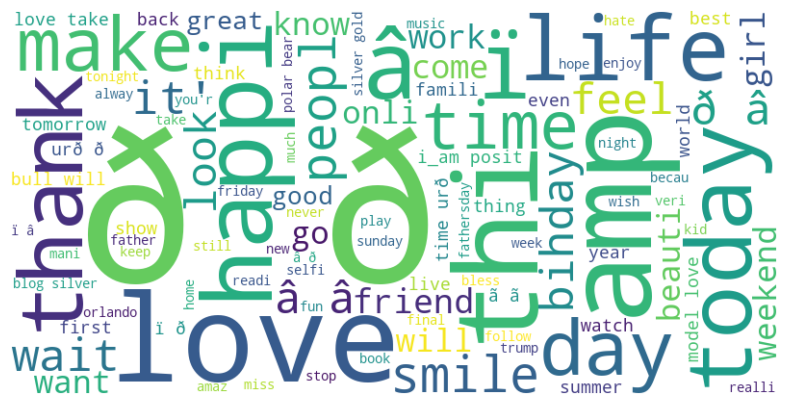

In [20]:

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,max_words=100,height=400,background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

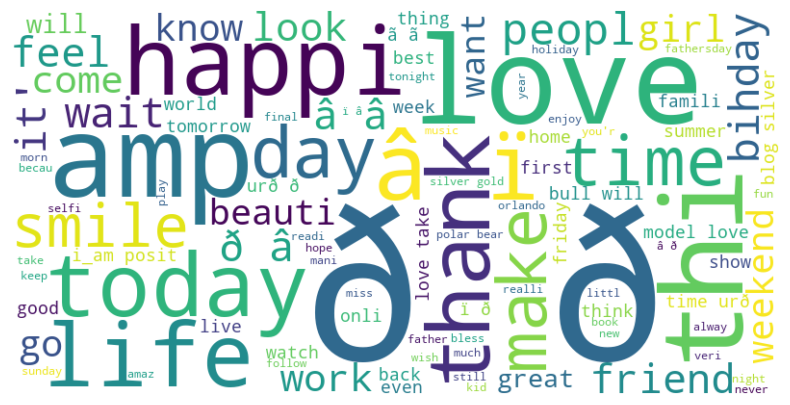

In [21]:
all_words="".join([sentences for sentences in df['clean_tweet'] [df['label']==0]])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,max_words=100,height=400,background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

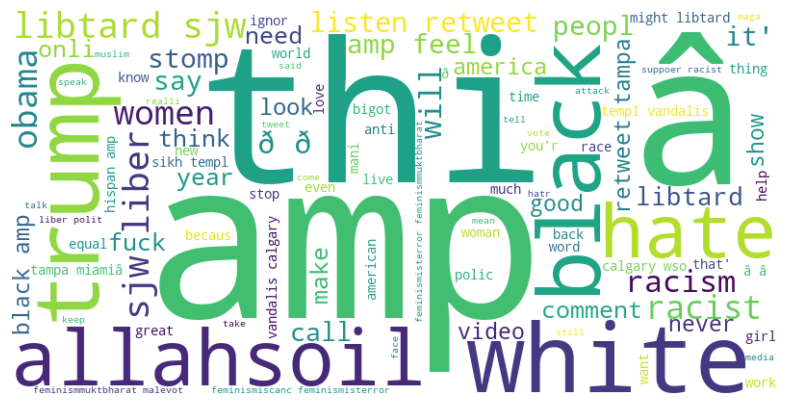

In [22]:
all_words="".join([sentences for sentences in df['clean_tweet'] [df['label']==1]])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,max_words=100,height=400,background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
def hastag_extract(tweets):
   hastags=[]
   for tweet in tweets:
      ht=re.findall(r"#(\w+)",tweet)
      hastags.append(ht)
   return hastags     

In [24]:
ht_positive= hastag_extract( df['clean_tweet'] [df['label']==0])
ht_negative=hastag_extract(df['clean_tweet'] [df['label']==1])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['traveling

In [25]:
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'r

In [26]:
ht_negative=sum(ht_negative,[])
ht_positive=sum(ht_positive,[])

In [27]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [28]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'hastag':list(freq.keys()),'count':list(freq.values())})
d.head()

,hastag,count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


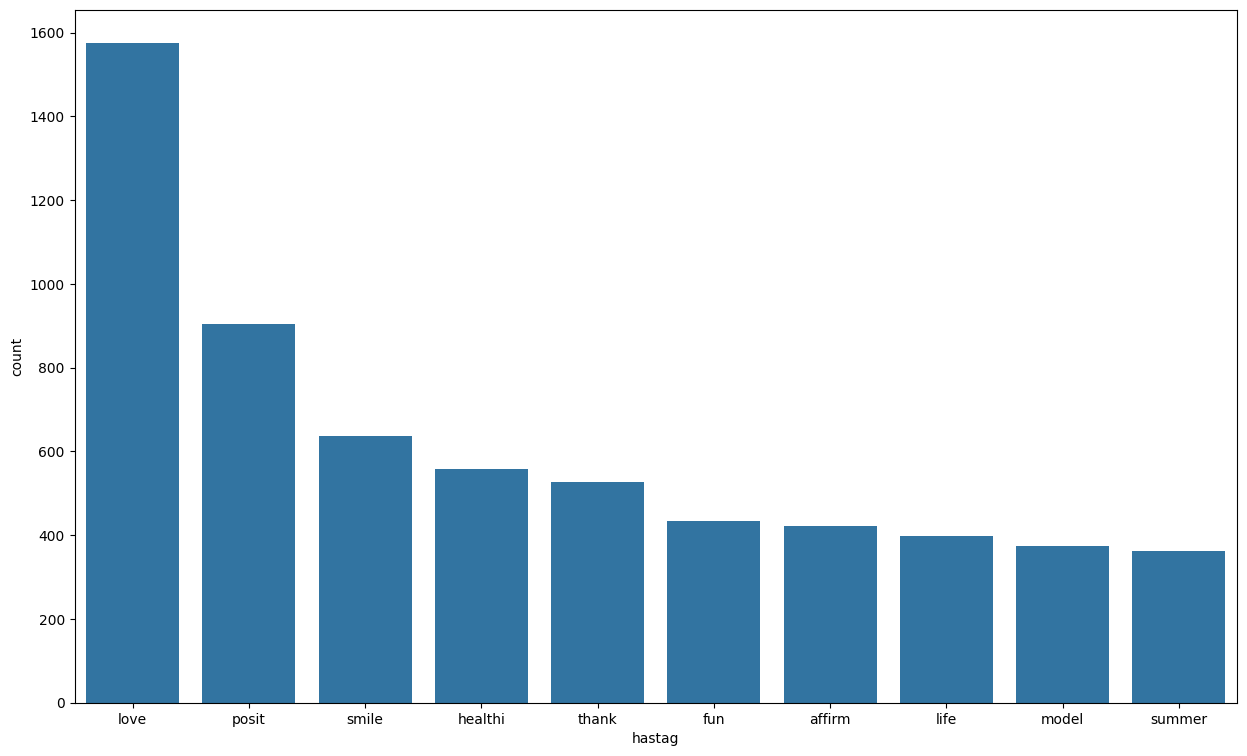

In [29]:
d=d.nlargest(columns='count',n=10)
plt.figure(figsize=(15,9))
sb.barplot(data=d,x='hastag',y='count')
plt.show()

In [30]:
ht_negative[:6]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd']

In [31]:
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'count':list(freq.values()),'hastag':list(freq.keys())})

In [32]:
d.head()

,count,hastag
0,9,cnn
1,2,michigan
2,14,tcot
3,6,australia
4,2,opkillingbay


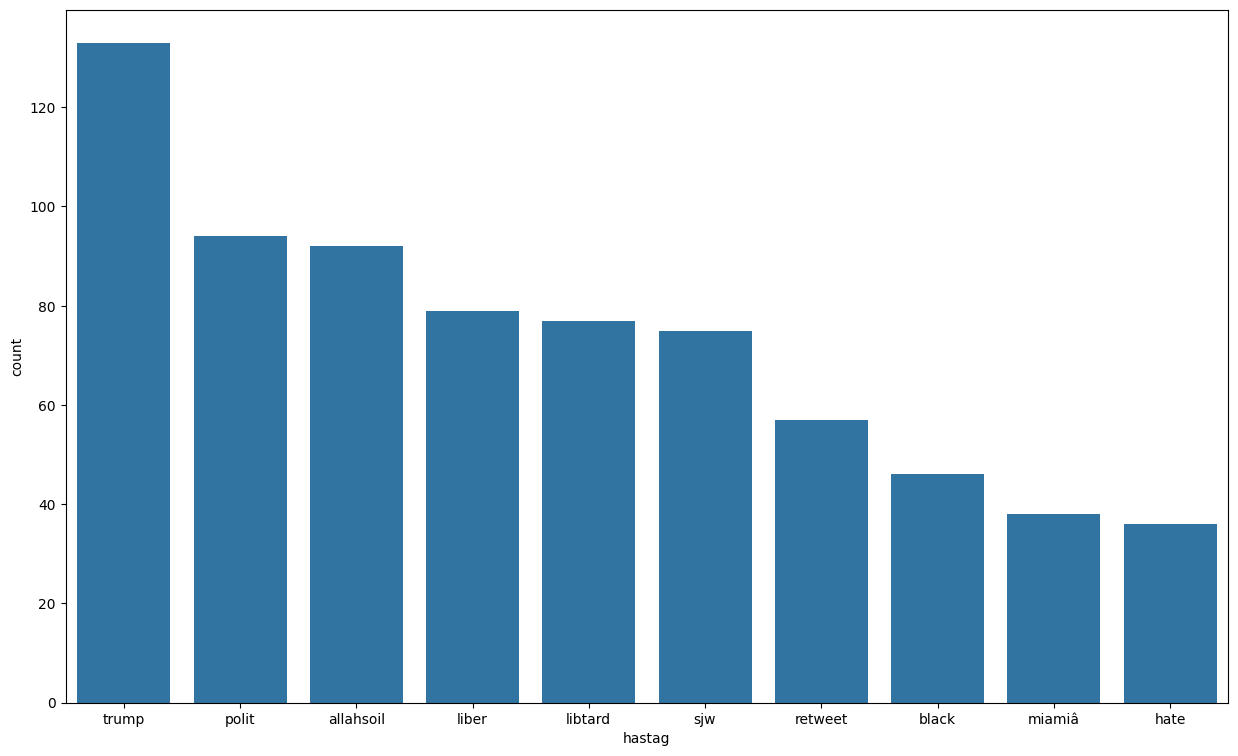

In [33]:
d=d.nlargest(columns='count',n=10)
plt.figure(figsize=(15,9))
sb.barplot(data=d,x='hastag',y='count')
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=100,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])
bow

<31962x100 sparse matrix of type '<class 'numpy.int64'>'
	with 54265 stored elements in Compressed Sparse Row format>

In [35]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],test_size=0.2,random_state=42)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score


In [38]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [39]:
pred=model.predict(x_test)
f1_score(y_test,pred)

0.15708812260536398

In [40]:
accuracy_score(y_test,pred)

0.9311747223525731